
---
Supervised Learning Algorithm Logistic Regression on Credit Card Transactions
---



### **Overview**
The following code trains logistic regression via stochastic gradient-based optimization for predicting fraudelent transactions from data having various features such as job, city population, xipcode, state, city, amount, first name, last name and others. With the training data the code will predict whether a transaction was fraudulent or not. Feature engineering is used in order to get the greatest accuracy. 



### **Implementing the Logistic Function [5 points]**####

The following logistic regression model was chosen and implemented. 
$$a = \frac{1}{1+e^{-b}}$$



In [24]:
from math import exp
import random
random.seed(1)
def logistic(x):
    #using the formula above s is a in the formula
    #calculating the denominator
    denominator = 1 + (exp(-x))
    #calculating s to be 1 over the denominator value calculated
    s = 1/denominator
    #returning s
    return s

### **Implementing the Dot Product [10 points]**###

The function dot calculates the dot product of two vectors. The following formula is used to calculate the product. 


$\mathbf a\mathbf \cdot \mathbf b = \sum_{i=1}^n a_i b_i = a_1b_1 + a_2 b_2 + ... + a_n b_n$



In [25]:
def dot(x, y):
    #the dot product is the element in one index times the element in the other 
    #list with the same index
    #starting with s being 0 to initialize it
    s = 0
    #using a for loop to go through the length of the list
    for i in range(len(x)):
      #adding to s the product of the elements in the list
      s = s + (x[i] * y[i])
    #returning s
    return s

### **Implementing the Prediction function for each data point**###

The function predict takes the dot product of the model's weights and the features and then takes the logistic regression. 


In [26]:
def predict(model, point):
    #calculating the dot product the same as above but with the weights
    #starting off p as 0 to initialize it
    p = 0
    #using a for loop to go through the length of the model list
    for i in range(len(model)):
      #adding to p the product of each weight times the feature
      p = p + (model[i] * point['features'][i])
    #calling the logistic function on p 
    p = logistic(p)
    #returning p
    return p

### **Gathering data**###

The dataset is loaded from google drive. The dataset is then reduced to only 
2,000 points since the original data was very unbalanced. 


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import csv
def load_csv(filename):
    lines = []
    counter_1 = 0
    counter_0 = 0
    with open(filename) as csvfile:
        reader = csv.DictReader(csvfile)
        for line in reader:
          if(line['is_fraud'] == '0'):
            if(counter_0 < 1072):
              lines.append(line)
              counter_0 += 1
          else:
            if(counter_1 < 1072):
              lines.append(line)
              counter_1 += 1
    return lines

def load_adult_data(fn):
    return load_csv(fn)

def load_adult_train_data(fn):
    return load_adult_data(fn)

def load_adult_valid_data(fn):
    return load_adult_data(fn)

In [29]:
#Append the directory to your python path using sys
import sys
import os
import matplotlib.pyplot as plt
prefix = '/content/drive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'Colab Notebooks/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)



fp_data = os.path.join(sys_path, 'fraudTest.csv')
data = load_adult_train_data(fp_data)
print('Path to adult.data: {}'.format(fp_data))

2144
Path to adult.data: /content/drive/My Drive/Colab Notebooks/fraudTest.csv


### **Calculating Accuracy, Precision, F1 Score, Recall**###

The accuracy is calculated using 0.5 as a threshold. Above 0.5 is True, below is False. 




In [30]:
def accuracy(data, predictions):
    #setting a counter for the number of times the predicted-real value is correct
    correct = 0;
    #using a for loop to go through the data
    for i in range(len(data)):
      #setting holder to 0 which sets the number of the prediction to 0 by default
      holder = 0
      #f the prediction valu ei sgreater than or equal to 0.5 then it is true
      #and holder is set to 1
      if(predictions[i] >= 0.5):
        holder = 1
      #if the holder value is equal to the label value then the prediction 
      #was correct and correct is incremented
      if(holder == data[i]['label']):
        correct += 1

    #returning the number of correctly predicted data points over the 
    #total points
    return float(correct)/len(data)
def precision(data, predictions):
    true_pos = 0
    false_pos = 0
    for i in range(len(data)):
      holder = 0
      if(predictions[i] >= 0.5):
        holder = 1
      if(holder == 1 and holder == data[i]['label'] ):
        true_pos += 1
      if(holder == 1 and holder != data[i]['label']):
        false_pos += 1
    return true_pos / (true_pos + false_pos)

def recall(data, predictions):
    true_pos = 0
    false_neg = 0
    for i in range(len(data)):
      holder = 0
      if(predictions[i] >= 0.5):
        holder = 1
      if(holder == 1 and holder == data[i]['label']):
        true_pos += 1
      if(holder == 0 and holder != data[i]['label']):
        false_neg += 1
    return true_pos / (true_pos + false_neg)

def F1Score(precision, recall):
  denominator = (1/precision) + (1/recall)
  return 2 * (1/denominator)

    



### **Training**###

The update rule as seen below is used for stochastic gradient descent. 


$$w_i^{(t+1)} \leftarrow w_i^{(t)} - \eta \lambda w_i^{(t)} + \eta \sum_l X_i^l (Y^l -\hat P(Y^l=1| X^l, W))$$



In [31]:
def initialize_model(k):
    return [random.gauss(0, 1) for x in range(k)]

def train(data, epochs, rate, lam):
    model = initialize_model(len(data[0]['features']))
    #I went to office hours with Hongjie Chen and Chongyu He. They were both  
    #very helpful and explained to me the formula. Hongjie Chen helped me set
    #up the for loops.
    
    #using a for loop to go through the number of iterations of epochs
    for t_epoch in range(epochs):
      #setting w as a list to hold each updated weight value 
      w = []
      #using a for loop to go through the length of model
      for i_model in range(len(model)):
        #calculating the second term in the formula
        second_term = rate * lam * model[i_model]
        #setting the third_term to 0 to initialize it because the formula
        #requires the sum over length l
        third_term = 0
        #using a for loop  to go over each element in the data
        for l_data in range(len(data)):
          #getting the random number for the index from 0 to n n will be exclusive
          index = random.randrange(0, (len(data)))
          #the x paramter when calling dot function will be the model from 1 to the last
          #because the formula for the probability that I used from the 
          #lecture slides starts at index 1
          dot_x = model[1:]
          #the y paramter when calling dot function will be the model from 1 to the last
          #because the formula for the probability that I used from the 
          #lecture slides starts at index 1
          dot_y = data[index]['features'][1:]
          #calculating the numerator of the probability 
          #function found in the slides
          #using dot instead of predict because I was getting an error and using 
          #parametric form
          exponential = exp(model[0] + dot(dot_x, dot_y))
          #calculating the third term of the formula above
          third_term = third_term + data[index]['features'][i_model] * (int(data[index]['label']) - (exponential / (1 + exponential)))
        #calculating the next weight by subtracting and adding the elements
        next_weight = model[i_model] - second_term + (rate * third_term)
        #adding the next_weight to the list
        w.append(next_weight)
      #setting the model to the new list of weights that were calculated
      model = w.copy()
      
      


    #returning model
    return model
    

### **Feature Engineering**###

In order to produce the best results feature engineering is used. A number of features were tested in order to improve the model. 
 

In [32]:
def extract_features(raw):
    data = []
    for r in raw:
        point = {}
        point["label"] = (r['is_fraud'] == '1')
       

        features = []
        

        #in order to see which features to add I opened the data in excel and 
        #looked at each category and which answers appeared the most.
        #I then added them here and ran the code to see if the accurracy increased
        #or decreased. 
        features.append(r['state'] == 'FL')
        features.append(float(r['amt']) >= 200)
        features.append(float(r['city_pop']) <= 1000)
        features.append(float(r['lat'])/61)
        features.append(r['category'] == 'travel')
        features.append(r['category'] == 'shopping_pos')
        
        
        
        
        point['features'] = features
        data.append(point)
    return data

### **Tuning**###

Different learning rates and parameters are tried in order to optimize the results. 





In [33]:
def tuning(data, epochs):
    random.seed(1)
    #In order to increase accuracy I started by decreasing the rate
    #I then increased the epochs and ran the program numerous times to see what 
    #gave the best results
    return train(data, epochs, .6e-3, 1e-2) 
    
    

2144


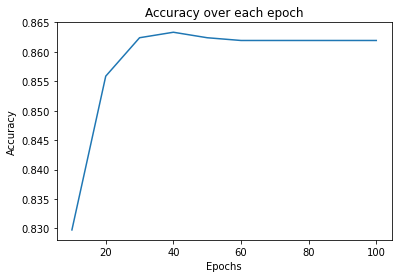

Accuracy: 0.863339552238806
Precision: 0.9609467455621302
Recall: 0.7574626865671642
F1Score: 0.8471570161711008


In [34]:
def test_data(fn):
    test_data = extract_features(load_adult_train_data(fn))
    x_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    a_list = []
    for i in x_list:
      model = tuning(test_data, i)
      predictions = [predict(model, p) for p in test_data]  
      acc = accuracy(test_data, predictions)
      a_list.append(acc)
    plt.plot(x_list, a_list)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over each epoch')
    plt.show()

    m = max(a_list)
    ind = a_list.index(m)
    model = tuning(test_data, x_list[ind])
    predictions = [predict(model, p) for p in test_data]    
    print("Accuracy:", accuracy(test_data, predictions))
    Precision = precision(test_data, predictions)
    print("Precision:", Precision)
    Recall = recall(test_data, predictions)
    print("Recall:", Recall)
    print("F1Score:", F1Score(Precision, Recall))
test_data(fp_data)

### **Acknowledgments**###

This algorithm of logistic regression was adapted using the ECE 4424 course Homework 2. 